# Projeto Final - Big Data Science - Semantix (Dez.2022)
# <b>Análise da base de dados do ENEM 2021</b>
## O modelo de ML prevê a nota final do aluno a partir de informações pessoais e das respostas ao questionário socio-econômico 
### Calcula uma estimativa de qual será a nota, antes do aluno fazer qualquer prova, somente pelas informações respondidas no processo de inscrição.

In [54]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

sb.set(rc={'figure.figsize':(20,15)})

In [3]:
# A base de dados é um arquivo de 2.238.106 registros de alunos que prestaram a prova do ENEM2021,
#    contendo respostas categorizadas à 33 perguntas pessoais preenchidas na inscrição para a prova.
# São 8 colunas com informações pessoais (faixa etária, sexo, estado civil, etc.)
#    e mais as respostas às 25 perguntas de um questionário socio-econômico.
# A última coluna, NOTA_FINAL, apresenta a média das notas obtidas por cada aluno nas quatro provas mais redação.

# Para detalhes sobre a análise e tratamento da base de dados original e a definição dos campos a serem
#    serem utilizados, veja o arquivo '1.Analise_tratamento_testes_dos_dados.ipynb'
#    disponível em: https://github.com/crobertocamilo/Analise-dados-ENEM_Projeto-Final_BigData_Science-Semantix

# Fonte original do dataset: os dados aqui utilizados estão publicamente disponíveis em:
#    https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

arquivo = '/kaggle/input/dados-enem2021-filtrados/Dados_ENEM2021_filtrados_novo.csv'
dados3 = pd.read_csv(arquivo, sep=';')

In [4]:
# Visualização dos dados. Cada linha contém as informações de um aluno que prestou o ENEM2021.
# Para compreender os rótulos das respostas, veja o arquivo '1.Analise_tratamento_testes_dos_dados.ipynb'
dados3

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,IN_TREINEIRO,CO_UF_PROVA,TP_LINGUA,Q001,Q002,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NOTA_FINAL
0,12,13,1,1,1,0,27,1,2,2,...,1,1,2,1,1,3,1,1,1,515.50
1,3,13,1,3,2,0,23,0,2,2,...,1,1,2,1,1,2,1,2,2,667.60
2,2,6,1,3,2,0,23,1,4,5,...,1,1,2,1,2,5,1,2,2,570.06
3,8,6,1,3,2,0,31,0,2,2,...,1,1,2,1,1,2,1,1,2,485.60
4,4,6,1,3,2,0,29,1,4,4,...,1,2,3,2,1,3,1,1,2,466.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2238101,15,6,1,1,4,0,35,1,2,2,...,1,1,2,1,1,4,1,2,2,403.58
2238102,14,13,2,3,1,0,31,1,8,3,...,1,1,2,2,1,3,2,2,2,444.14
2238103,10,13,1,1,1,0,33,0,5,5,...,1,2,2,1,2,4,2,3,2,626.30
2238104,5,6,1,3,1,0,13,1,3,8,...,1,1,2,1,1,3,1,1,2,438.88


In [5]:
#Certificar-se de que todo o arquivo foi baixado/envidado
#Deve conter 2238106 linhas por 34 colunas
if dados3.shape == (2238106, 34):
    print("A base de dados foi importada com sucesso!")
else:
    print("Houve algum erro no carramento ou download da base de dados! Por favor, tente novamente.")

A base de dados foi importada com sucesso!


In [6]:
# As 33 colunas iniciais são as informações que serão utilizadas para o treino e predição do modelo (features).
# A coluna final (a nota final do aluno) é a variável a ser predita.
X = dados3.loc[:, dados3.columns != 'NOTA_FINAL']
y = dados3['NOTA_FINAL']

In [7]:
# O algoritmo irá treinar com 80% dos registros (1.790.484), e testar os resultados com os 20% restantes (447.622).
from sklearn.model_selection import train_test_split

treino_X, val_X, treino_y, val_y = train_test_split(X,y,random_state=2,train_size=0.8)
treino_X.shape

(1790484, 33)

In [8]:
treino_X.shape[0]+len(val_X) == dados3.shape[0]

True

## Predição da nota final do aluno utilizando o algoritmo <b>Decision Tree</b>

In [9]:
# Importação das bibliotecas e divisão dos dados em dois conjuntos (treino e teste)
from sklearn.tree import DecisionTreeRegressor  
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

treino_X, val_X, treino_y, val_y = train_test_split(X,y,random_state=2,train_size=0.8)

In [10]:
# Cria o modelo, treina e faz a predição da nota final dos alunos no conjunto de teste.
# Os testes dos parâmetros a *max_depth* e *min_samples_leaf* a serem utilizados são apresentados no arquivo
#    '1.Analise_tratamento_testes_dos_dados.ipynb'

modelotree = DecisionTreeRegressor(random_state=1,max_depth=50,min_samples_leaf=10)
modelotree.fit(treino_X, treino_y)
predicaotree2 = modelotree.predict(val_X)

In [76]:
#Comparando alguns valores preditos com a resposta esperada (a nota final que o aluno realmente tirou)
dadostree = pd.DataFrame(val_y)
dadostree['Nota predita'] = predicaotree2
dadostree['Erro'] = dados3['NOTA_FINAL'] - dadostree['Nota predita']
dadostree.sample(15)

,NOTA_FINAL,Nota predita,Erro
1627203,543.20,570.552308,-27.352308
102228,694.82,558.286154,136.533846
154704,580.12,574.027059,6.092941
521053,486.20,456.844000,29.356000
1799697,523.50,557.246154,-33.746154
377597,448.62,467.903333,-19.283333
546042,602.72,514.640000,88.080000
1683346,540.84,517.886667,22.953333
621487,428.84,547.101429,-118.261429
1470650,659.20,552.910769,106.289231


In [45]:
dadostree.to_csv('Dadostree.csv',index = True, sep=';', encoding='utf-8')

In [23]:
# Cálculo do erro médio na predição das notas no conjunto de treino (447.622 registros).
mean_absolute_error(val_y,predicaotree2)

62.21512120588078

##### Resposta (erro absoluto médio): 62.21512120588078  

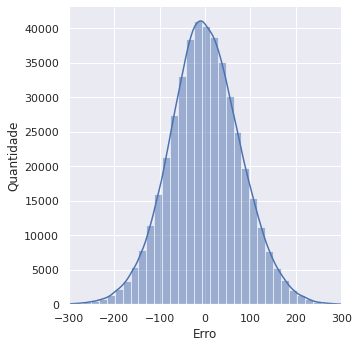

In [74]:
# Analisando o erro do modelo num histograma
sb.displot(dadostree['Erro'], bins = 50, kde = True)
plt.xlim(-300,300)
plt.xlabel("Erro",fontsize=12)
plt.ylabel("Quantidade",fontsize=12)
plt.savefig('ErroTree.png', dpi=300)
plt.show()

#### <b>Conclusão:</b> 
#### O modelo conseguiu prever a nota final do aluno com um <b>erro médio de aprox. 62,2 pontos</b> para mais ou para menos, sendo o espectro de notas possíveis entre 0 e 1000 pontos. 
  
#### O histograma do erro calculado mostra uma distribuição centrada próxima à zero (na maioria dos casos, o erro é pequeno), e aproximadamente simétrica (o algoritmo erra de forma equivalente para mais ou para menos, não há um viés).

### Verificação do modelo utilizando *cross-validation*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

modelotree = DecisionTreeRegressor(random_state=1,max_depth=50,min_samples_leaf=3)

#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=0)
treino_X, val_X, treino_y, val_y = train_test_split(X,y,random_state=2,train_size=0.8)

modelotree2 = DecisionTreeRegressor(random_state=0, max_depth=50,min_samples_leaf=3, criterion='absolute_error')
tree_fit = modelotree.fit(treino_X, treino_y)

tree_scores = cross_val_score(tree_fit, treino_X, treino_y, scoring='accuracy',cv = 5)
print('Score médio na validação cruzada: {}'.format(np.mean(tree_scores)))

Resposta: -0.06056625712508743

#### <b>Avaliação:</b>  
#### O score médio para 5 rodadas foi de aprox. -0.061, próximo de zero, indicando que não está havendo *overfitting* no modelo. O modelo, considerando o erro médio apresentado, é adequado à predição da nota final de novos alunos.

In [25]:
tree_scores

NameError: name 'tree_scores' is not defined

Resposta:  
array([-0.05347239, -0.06362943, -0.05941949, -0.06391427, -0.06239571])

## Predição da nota final do aluno utilizando o algoritmo <b>K-Nearest Neighbors (KNN)</b>

A importação das bibliotecas e a manipulação dos dados será feita novamente, possibilitando que este trecho de código seja executado independentemente (não é necesário executar os códigos para o Decision Tree antes).

In [3]:
# Importação das bibliotecas e divisão dos dados em dois conjuntos (treino e teste)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# O argumento passado ao KNeighborsRegressor indica o número de vizinhos a serem considerados 
modelo = KNeighborsRegressor(3)

# Treinar o modelo para estimar y (nota final do aluno) a partir das features em X (suas respostas ao questionário)
modelo.fit(X,y)

# Teste para os 10000 primeiros registros
#predicao10000 = modelo.predict(X.head(10000))
#mean_absolute_error(y[0:10000],predicao10000)
# Resposta: 47.250752

KNeighborsRegressor(n_neighbors=3)

In [4]:
# Divisão dos dados em dois conjuntos (treino e teste)
treino_X, val_X, treino_y, val_y = train_test_split(X,y,random_state=1,train_size=0.8)
treino_X.shape

(1790484, 33)

In [5]:
# Cria o modelo, treina e faz a predição da nota final dos alunos no conjunto de teste.
# Nos testes realizados, K=3 vizinhos apresentou os melhores resultados,
#    sendo observado o aumento do erro absoluto médio para valores maiores (K=5,7)
modelo = modelo = KNeighborsRegressor(3)
modelo.fit(treino_X, treino_y)
predicao = modelo.predict(val_X)

mean_absolute_error(val_y,predicao)

# 65.15513279806027

65.15513279806027

##### Resposta (erro absoluto médio): 65.15513279806027

In [77]:
#Comparando alguns valores preditos com a resposta esperada (a nota final que o aluno realmente tirou)
dadosK = pd.DataFrame(val_y)
dadosK['Nota predita'] = predicao
dadosK['Erro'] = dados3['NOTA_FINAL'] - dadosK['Nota predita']
dadosK.sample(15)

,NOTA_FINAL,Nota predita,Erro
176224,540.00,518.393333,21.606667
1088917,451.38,513.046667,-61.666667
1116215,498.32,578.746667,-80.426667
785324,663.40,424.720000,238.680000
1337145,501.66,588.186667,-86.526667
816215,711.32,521.213333,190.106667
1941397,474.78,443.253333,31.526667
2029313,566.64,621.886667,-55.246667
833221,448.70,467.573333,-18.873333
319588,560.50,500.400000,60.100000


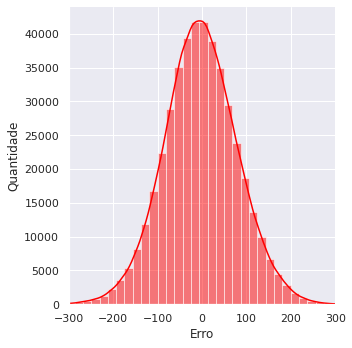

In [75]:
# Analisando o erro do modelo num histograma
sb.displot(dadosK['Erro'], bins = 50, color='Red',kde = True)
plt.xlim(-300,300)
plt.xlabel("Erro",fontsize=12)
plt.ylabel("Quantidade",fontsize=12)
plt.savefig('ErroKNN.png', dpi=300)
plt.show()

In [48]:
dadosK.to_csv('DadosK.csv',index = True, sep=';', encoding='utf-8')

#### <b>Conclusão:</b> 
#### O modelo conseguiu prever a nota final do aluno com um <b>erro médio de aprox. 65,2 pontos</b> para mais ou para menos, sendo o espectro de notas possíveis entre 0 e 1000 pontos.

#### O histograma dos erros calculados indica uma distibuição essencialmente uniforme e centrada na origem, indicando que erro menores são os mais frequentes e que proporcionalmente o modelo tanto pode errar para mais quanto para menos.

#### Não é mostrada a validação cruzada para o KNN, pois seu processamento é significativamente mais lento.

#### Embora apresente um resultado equivalente ao obtido acima com árvores de decisão, a execução utilizando o KNN é significativamente mais lenta, por isso <b>o primeiro método (Decision Tree) foi considerado mais adequado à solução do problema proposto</b>. 

 
 
  

  
  
  
  
## Predição da nota final do aluno utilizando o algoritmo <b>Support-Vector Machine (SVM)</b>

A importação das bibliotecas e a manipulação dos dados será feita novamente, possibilitando que este trecho de código seja executado independentemente (não é necesário executar os códigos para o Decision Tree antes).

In [30]:
# Importação das bibliotecas e divisão dos dados em dois conjuntos (treino e teste)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
#from sklearn.grid_search import GridSearchCV

treino_X, val_X, treino_y, val_y = train_test_split(X,y,random_state=1,train_size=0.8)
treino_X.shape

(1790484, 33)

In [ ]:
modeloSVM = StandardScaler()

SVM_polinomial = SVR(kernel = 'poly', degree = 3, gamma = 'scale', C = 1.0, coef0 = 2)
SVM_polinomial.fit(treino_X, treino_y)

#print(SVM_polinomial)
predicaoSVM = SVM_polinomial.predict(val_X)
mean_absolute_error(val_y,predicaoSVM)

In [ ]:
modeloSVM = StandardScaler()
#treino_X = modeloSVM.fit_transform(treino_X)
#val_X = modeloSVM.transform(val_X)

SVM_polinomial = SVR(kernel = 'poly', degree = 3, gamma = 'scale', C = 1.0, coef0 = 2)
SVM_polinomial.fit(X, y)

print(SVM_polinomial)
predicaoSVM100 = SVM_polinomial.predict(X.head(100))

mean_absolute_error(y[0:100],predicaoSVM100)